## MCMC-ABC

### Introduction

* It is not uncommon for the data generation step in ABC algorithms to be expensive and thereby dominate the computational overheads of the algorithms. 
* In the rejection ABC algorithm, proposal parameters $\theta^*$ are sampled from the prior $\pi(\theta)$, and only parameters that are likely under the approximate posterior $\pi_\mathrm{ABC} \left( \theta \middle| \rho (s, s_0) \leq \epsilon \right)$ are accepted. 
* Although this strategy can be effective computationally because the prior is easy to draw random samples from, the efficiency of the procedure overall is determined by whether the prior is chosen such that it is of a similar shape and location to the desired posterior. 
* When more of the candidate proposals will resemble the posterior, the acceptance rate will be high and less of the expensive data generation is necessary. 
* However, the acceptance rate will be low if the approximate posterior is significantly narrower than the prior, as is often the case, and the rejection ABC algorithm will hence be computationally inefficient as more of the expensive data generation is necessary. 
* In this case, we might choose to develop a recursive strategy where the quality of previous candidates in our sampling algorithm can be used to guide the candidate generation process. 
* Basing proposal samples off of previous states is precisely the strategy behind conventional Markov chain Monte Carlo (MCMC) methods.

### The ABC Metropolis-Hastings Sampler

* MCMC algorithms, which have been instrumental in advancing Bayesian estimation techniques, are iterative procedures that evaluate and filter parameter proposals $\theta^*$ in such a way that we eventually obtain a sample of proposal values that are from the desired posterior distribution.
* The most popular MCMC sampler is the Metropolis-Hastings algorithm. 

**To perform Metropolis-Hastings sampling:** 

* We begin by first initializing a "chain" of parameter values with some initial value $\theta_0$. 
* Given $\theta_0$, we then sample a candidate value $\theta^*$ from a proposal distribution, such as a Gaussian distribution, from which sampling is easily done. We denote the proposal distribution as $q \left(\theta^* \middle| \theta_0 \right)$.
* The distribution of the first proposal $\theta^*$ is conditioned on the initial value $\theta_0$, but for subsequent proposals, their distributions will be conditioned on the current value of the chain.
* To evaluate the quality of the newly proposed value $\theta^*$, we must calculate its relative posterior density and compare it to the relative posterior density of the initial value $\theta_0$. 
* If the posterior density of $\theta^*$ is higher than that of $\theta_0$, we keep it and it becomes the next value $\theta_1$ in the chain. 
* If it is lower, we accept the value of $\theta^*$ with a probability determined by the ratio of the posterior densities. 
* In this way, the values in the chain tend to move toward the highest probability regions of the posterior, but it can still move away from these high-probability regions and toward the tails of the posterior. 
* (^ ergodicity) 
* To perform Metropolis-Hastings sampling in the likelihood-free context, we calculate the probability of accepting $\theta^*$ by evaluating

\begin{align}
    \alpha = \begin{cases}
        \min \left(1, \frac{\pi \left(\theta^{*}\right) q \left(\theta_0 \middle|\theta^*\right)}{\pi \left(\theta_0\right) q \left(\theta^* \middle|\theta_0\right)}\right) \qquad &\text{if } \rho(s, s_0) \leq \epsilon
        \\
        0 \qquad &\text{if } \rho(s,s_0) > \epsilon
    \end{cases}
\end{align}

* To implement the sampler in a computer program, after computing $\alpha$ for $\theta^*$, we would draw a sample $r \sim \mathrm{U}(0,1)$. If $ r < \alpha$, we reject the proposal and set $\theta_1 = \theta_0$. 

### Metropolis-Hastings Algorithm

1. Initialize $\theta_0$ 
2. Propose $\theta^*$ from a proposal distribution $q (\theta | \theta^*)$
3. Simulate $M(\theta^*)$
4. If $\rho(s, s_0) \leq \epsilon$ go to \#5, otherwise set $\theta_{i+1}=\theta_i$ 
5. Set $\theta_{i+1} = \theta^*$ with probability $\alpha$ and $\theta_{i+1}=\theta_i$ with probability $1-\alpha$
6. Set $i = i +1$ and go to \# 2

### Symmetric Proposal Distribution

In the Metropolis-Hastings algorithm, one usually considers a symmetric proposal distribution:

$$ q\left(\theta^* \middle| \theta^{(i)} \right)$$

where $\theta^*$ is a proposal point and $\theta^{(i)}$ is the accepted value at iteration $i$. The symmetry states that 

$$ q \left(\theta^* = \theta_b \middle| \theta^{(i)} = \theta_a \right) = q \left(\theta^* = \theta_a \middle| \theta^{(i)}=\theta_b \right)$$

The symmetry makes the ratio cancel in the Metropolis-Hastings acceptance probability. This makes life easier by avoiding the ratio of proposals. It may save time or it may avoid computing complex or intractable densities. 

### Notes 

Good note: https://rstudio-pubs-static.s3.amazonaws.com/261930_9fb04332352f4ef79eb708ae96898d99.html

* __We want to:__ find the posterior of a parameter $\theta$ given data $y$. 
* __We do this by:__ rejection sampling as described by the _Markov chain Monte Carlo (MCMC)_ technique _Metropolis-Hastings_. 
* __Bayes' theorem:__ 

\begin{align}
    \text{Posterior} &\propto \text{Likelihood}\times \text{Prior} 
    \\
    \pi(\theta | y) &\propto p(y | \theta) \pi(\theta)
\end{align}

There are three parts to the technique: 

1. Monte Carlo 
2. Markov Chains 
3. Metropolis-Hastings

**Monte Carlo** 
* The term Monte Carlo refers to methods that rely on the generation of random numbers. 
* In our context: We draw $\theta$ from a _proposal distribution_. For example:

$$\theta \sim \mathrm{N}(\mu, \sigma^2)$$

**Markov Chains** 
* A Markov chain is a sequence of values where each value is dependent on the previous value in the sequence

$$\theta_t \sim \mathrm{N}(\theta_{t-1}, \sigma^2)$$ 

* If we make a trace plot of $\theta$, it appears to wander and the process is therefore often called a *random walk*.

**Metropolis-Hastings** 
* The Metropolis-Hastings algorithm is used to decide which proposed values of $\theta$ to accept or reject. 
* We begin by calculating the posterior probability using the newly generated value of $\theta$. We also calculate the posterior probability using the previous value of $\theta$: 

$$r (\theta_\mathrm{new}, \theta_{t-1}) = \frac{\text{Posterior probability of } \theta_\mathrm{new}}{\text{Posterior probability of } \theta_{t-1}}$$

* Note that we do not actually use the posterior directly, but the proportionality given by Bayes' theorem. 
* If the posterior probability is greater for the new value of $\theta$, the ratio of the probabilities will be greater than 1 and we will always accept the new value of $\theta$. 
* If the posterior probability is greater for the previous value of $\theta$, we will not necessarily discard the new value of $\theta$. 
    * We can treat ratios less than 1 as an acceptance probability
    
    $$ \text{acceptance probability} = \alpha (\theta_\mathrm{new}, \theta_{t-1}) = \min \left( r (\theta_\mathrm{new}, \theta_{t-1}), 1 \right)$$
    
    * Then, we can draw a uniform random number and keep the new value if $\theta$ if the random number is less than the acceptance probability
    * Otherwise, we discard the new value of $\theta$ and keep the previous value. 
    * Algorithmically:
        * Draw $u \sim \mathrm{U}(0,1)$
        * If $u < \alpha (\theta_\mathrm{new}, \theta_{t-1})$, then $\theta_t = \theta_\mathrm{new}$
        * Otherwise $\theta_t = \theta_{t-1}$ 
     

### Need to figure out 

**1.**

If posterior probability of $\theta^*$ is higher, i.e. MH ratio $r>1$, can we accept without doing a simulator call? 


**2.**  

If we have multiple parameters, we want a single joint prior. This joint prior is then a function of the parameter vector $\theta = (\theta_1, \theta_2, ..., \theta_n)$. 

**Claim**  
If the parameters are treated independently, the prior factorizes into a product of the 'individual priors': 

$$\pi (\theta) = \prod_{i=1}^n \pi(\theta_i)$$

## Implementation

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pylfi 
import scipy.stats as stats
import seaborn as sns 

sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

### Problem setup

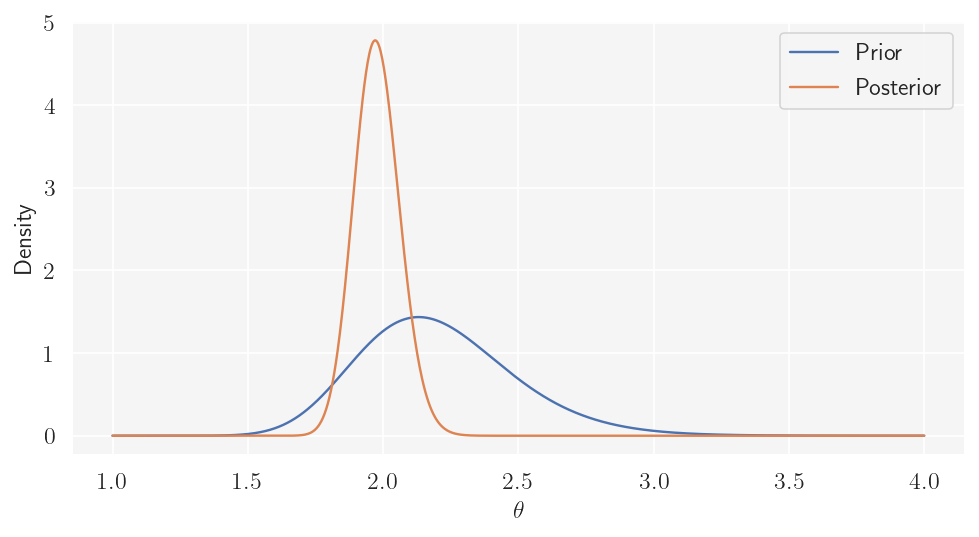

In [15]:
# global variables
groundtruth = 2.0  # true variance
N = 1000           # number of observations

# observed data
likelihood = stats.norm(loc=0, scale=np.sqrt(groundtruth))
obs_data = likelihood.rvs(size=N)


def summary_statistic(data):
    return np.var(data)


def simulator(theta, N=1000):
    """Simulator model, returns summary statistic"""
    model = stats.norm(loc=0, scale=np.sqrt(theta))
    sim = model.rvs(size=N)
    return sim

# prior (conjugate)
alpha = 60         # prior hyperparameter (inverse gamma distribution)
beta = 130         # prior hyperparameter (inverse gamma distribution)
theta = pylfi.Prior('invgamma', alpha, loc=0, scale=beta, name='theta')
priors = [theta] 

# true posterior 
alphaprime = alpha + N / 2
betaprime = beta + 0.5 * np.sum(obs_data**2)
posterior = stats.invgamma(alphaprime, loc=0, scale=betaprime)

# plot prior and posterior
x = np.linspace(1, 4, 1000)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, theta.pdf(x), label="Prior")
ax.plot(x, posterior.pdf(x), label="Posterior")
ax.set(xlabel=r"$\theta$", ylabel="Density")
ax.legend()
plt.show()

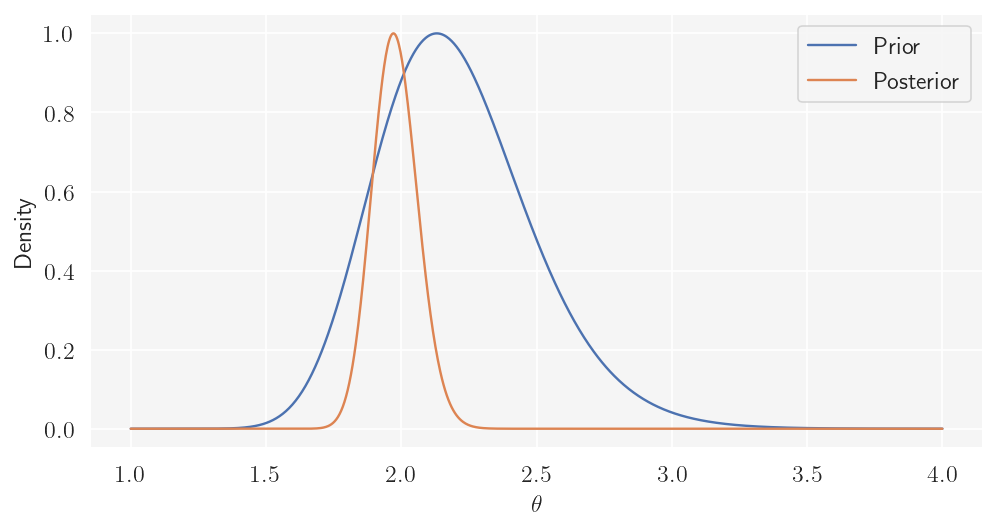

In [16]:
x = np.linspace(1, 4, 1000)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, theta.pdf(x) / np.max(theta.pdf(x)), label="Prior")
ax.plot(x, posterior.pdf(x) / np.max(posterior.pdf(x)), label="Posterior")
ax.set(xlabel=r"$\theta$", ylabel="Density")
ax.legend()
plt.show()

### MCMC-ABC Code

In [ ]:
from pylfi.inferences import ABCBase
from pylfi.utils import (advance_PRNG_state, check_and_set_jobs,
                         distribute_workload, generate_seed_sequence,
                         setup_logger)


class MCMCABC(ABCBase):

    def __init__(self, observation, simulator, statistics_calculator, priors, distance_metric='l2', seed=None):

        super().__init__(
            observation=observation,
            simulator=simulator,
            statistics_calculator=statistics_calculator,
            priors=priors,
            distance_metric=distance_metric,
            seed=seed
        )

    def sample(self, n_samples, epsilon=None, sigma=0.5, burnin=100, n_jobs=-1, log=False):
        _inference_scheme = "MCMC-ABC"
        self._epsilon = epsilon
        self._sigma = sigma
        self._rng = np.random.default_rng
        self._prior_logpdfs = [prior.logpdf for prior in self._priors]

    def _sample(self, n_samples, seed):
        """Sample n_samples from posterior."""

        self._n_sims = 0
        samples = []

        # initialize chain
        thetas_current = self._draw_first_posterior_sample(seed)
        samples.append(thetas_current)

        for _ in range(n_samples):
            sample = ---  # call MH sampler
            samples.append(sample)
            pass

        return samples

    def _draw_first_posterior_sample(self, seed):
        """Draw first posterior sample from prior via Rejection ABC algorithm."""
        sample = None
        while sample is None:
            next_gen = advance_PRNG_state(seed, self._n_sims)
            thetas = [prior.rvs(seed=next_gen) for prior in self._priors]
            sim = self._simulator(*thetas)
            sim_sumstat = self._stat_calc(sim)
            self._n_sims += 1
            distance = self._distance_metric(self._obs_sumstat, sim_sumstat)
            if distance <= self._epsilon:
                sample = thetas

        return sample

    def _draw_proposal(self, thetas_current, seed):
        """Suggest a new position"""

        # advance PRNG state
        next_gen = advance_PRNG_state(seed, self._n_sims)

        # Gaussian proposal distribution
        proposal_distr = stats.norm(
            loc=thetas_current,
            scale=self._sigma,
            random_state=self._rng(seed=next_gen)
        )

        # draw proposal parameters
        thetas_proposal = proposal_distr.rvs()

        return thetas_proposal

    def _metropolis_hastings_step(self):
        pass

### Playground

In [ ]:
# prior distribution
prior = pylfi.Prior('norm', loc=0, scale=1, name='theta')
prior_pdf = prior.pdf
prior_logpdf = prior.logpdf

# draw from prior distribution
#thetas_current = [prior.rvs()]
thetas_current = [prior.rvs(), prior.rvs()]

# proposal distribution
sigma = 0.5
proposal_distr = stats.norm(loc=thetas_current, scale=sigma)

# draw from proposal
thetas_proposal = proposal_distr.rvs()

# Compute prior probability of current and proposed
prior_current = prior_pdf(thetas_current)
prior_proposal = prior_pdf(thetas_proposal)
log_prior_current = prior_logpdf(thetas_current).prod()
log_prior_proposal = prior_logpdf(thetas_proposal).prod()

# since the proposal density is symmetric, the proposal density ratio in MH
# acceptance probability cancel. Thus, we need only to evaluate the prior ratio

# no need to evaluate the MH-ratio, but check that prior > 0

mh_prior_ratio = np.exp(log_prior_proposal - log_prior_current)
alpha = np.minimum(1., mh_prior_ratio)
print(mh_prior_ratio)
print(alpha)